In [42]:
# Imports we may/will need
%matplotlib inline
import numpy as np
import sympy as sp
from sympy import cos, sin, exp
from Boundary import *
from matplotlib import pyplot as plt

In [43]:
# Try to use Cartesian Coordinate system to simulate scattering of source by a Clover-shaped boundary

# Polar Form
# r = sin(2θ) + 0.25sin(6θ) from 0 to 2π


# Cartesian Form (Gets too complicated)
# Idea: Create Cartesian grid, but convert (x,y) rectangular coordinates to polar (r, theta)
# Then use Polar Form to see if coordinate falls inside or outside the Clover

In [44]:
# We will use to redefine rectangular coordinates of Cartesian grid to polar coordinates 
def rec_to_polar(x,y):
    r = x**2 + y**2
    θ = np.arctan2(y, x)
    return r, θ

In [45]:
rec_to_polar(0,1) # Should be (1, pi/2)

(1, 1.5707963267948966)

In [46]:
# Define Clover Boundary we will try to use
t = sp.Symbol('t')

Clover = ((sin(2*t) + 0.25*sin(6*t))*cos(t), (sin(2*t) + 0.25*sin(6*t))*sin(t))
C = Boundary(Clover)
lclassB(C)

In [47]:
M = 100
dt = 2.0 * np.pi / M
θ = np.arange(0, 2*np.pi, dt)

x,y = C.y_l(θ) # Defines the boundary for us to use 

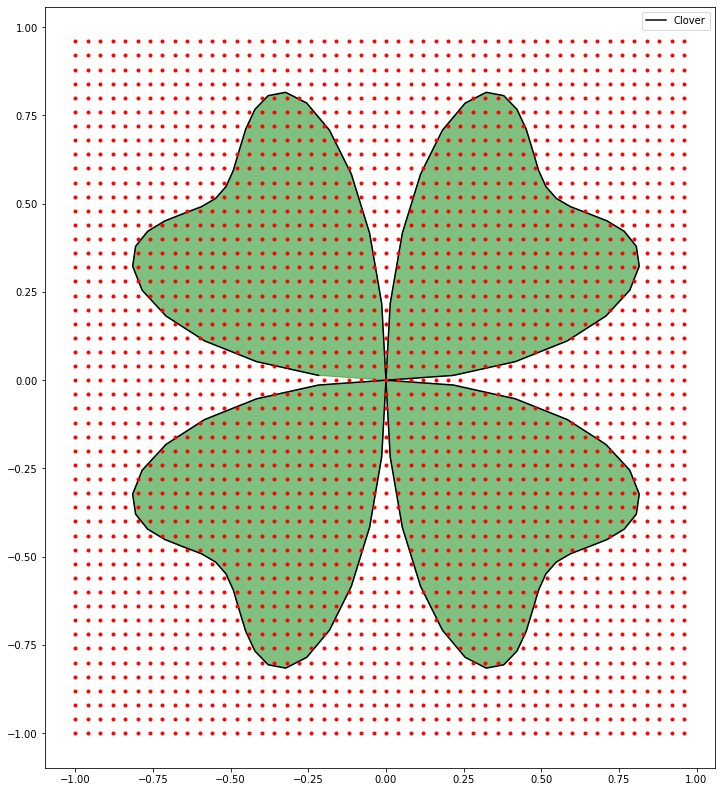

In [48]:
fig = plt.figure(figsize=(12, 14))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, 'k', label='Clover')
ax1.fill(x,y, c='g',alpha=0.5)
ax1.legend(loc='upper right')

# Note this clover stays between x = [-1,1] and y = [-1, 1]... we will use evenly spaced points in this square for the cartesian grid
# Point demo
N = 50
dx = (1 + 1)/N
dy = (1 + 1)/N
xgrid = np.arange(-1, 1, dx)
ygrid = np.arange(-1, 1, dy)
for m in range(0, np.size(xgrid)):
    for n in range(0, np.size(ygrid)):
        ax1.plot(xgrid[m], ygrid[n], 'r.', label='grid')

In [49]:
# Point demo - interior or exterior?

# Boundary is r = sin(2θ) + 0.25sin(6θ)
# If r < sin(2θ) + 0.25sin(6θ) it should be inside the grid

clover_rad = lambda x, y: sin(2*np.arctan2(y,x)) + 0.25*sin(6*np.arctan2(y,x))

def int_or_ext(x, y):
    r, θ = rec_to_polar(x,y)
    bdy_r = clover_rad(x,y)
    if r < bdy_r:
        return -1
    elif r > bdy_r:
        return 1
    else:
        return 0

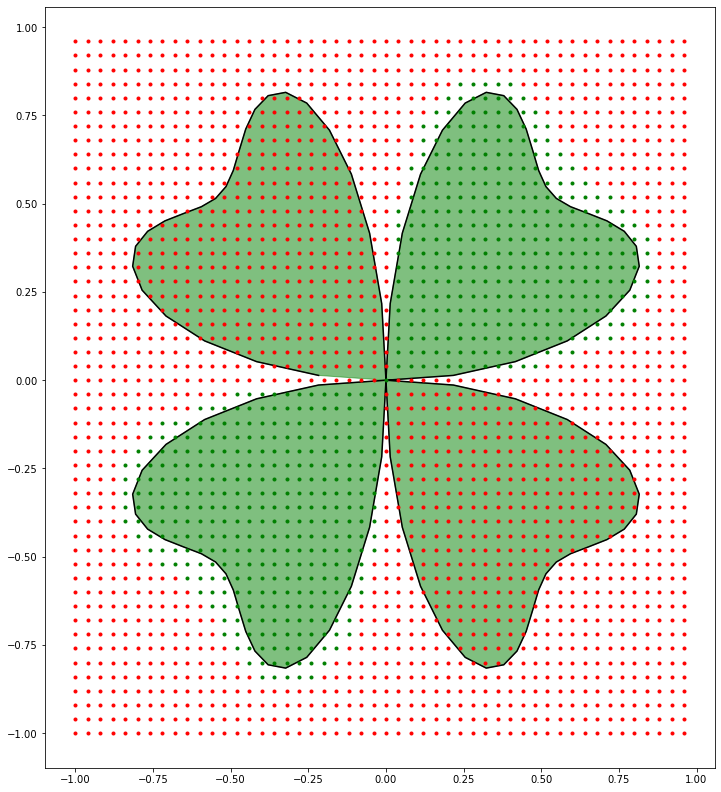

In [50]:
fig = plt.figure(figsize=(12, 14))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, 'k', label='Clover')
ax1.fill(x,y, c='g',alpha=0.5)
for m in range(0, np.size(xgrid)):
    for n in range(0, np.size(ygrid)):
        check = int_or_ext(xgrid[m], ygrid[n])
        if check == -1:
            ax1.plot(xgrid[m], ygrid[n], 'g.', label='interior')
        elif check == 1:
            ax1.plot(xgrid[m], ygrid[n], 'r.', label='exterior')
        else:
            ax1.plot(xgrid[m], ygrid[n], 'k.', label='bdy')
            
# This doesn't work at all as expected ... need to examine equations and how x,y results are determined...

# Two of the clovers seem to work, but extra points are alloted.
# The other two clovers do not work at all.

In [51]:
# In DESMOS, only two leaves are included in the interior domain as well.

# Note: Captured points are (+,+) or (-, -).

# What if we only evaluate (+, +) points and then assign the (-, -), (+, -), and (-, +) versions accordingly?

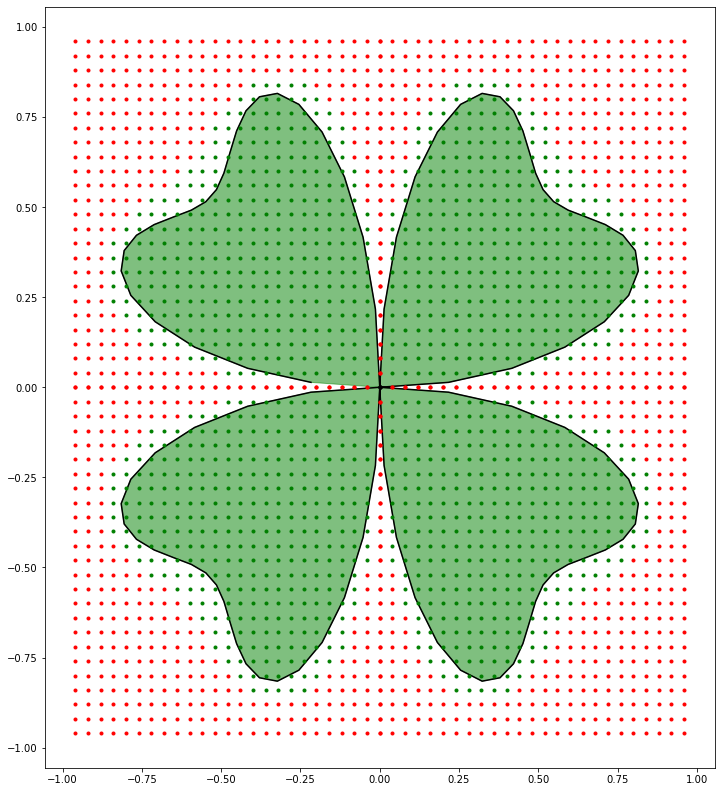

In [52]:
fig = plt.figure(figsize=(12, 14))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, 'k', label='Clover')
ax1.fill(x,y, c='g',alpha=0.5)

pos_x = np.arange(0, 1, dx)
pos_y = np.arange(0, 1, dy)
for m in range(0, np.size(pos_x)):
    for n in range(0, np.size(pos_y)):
        check = int_or_ext(pos_x[m], pos_y[n])
        if check == -1:
            ax1.plot(pos_x[m], pos_y[n], 'g.', label='interior')
            ax1.plot(-pos_x[m], -pos_y[n], 'g.', label='interior')
            ax1.plot(pos_x[m], -pos_y[n], 'g.', label='interior')
            ax1.plot(-pos_x[m], pos_y[n], 'g.', label='interior')
        elif check == 1:
            ax1.plot(pos_x[m], pos_y[n], 'r.', label='exterior')
            ax1.plot(-pos_x[m], -pos_y[n], 'r.', label='exterior')
            ax1.plot(pos_x[m], -pos_y[n], 'r.', label='exterior')
            ax1.plot(-pos_x[m], pos_y[n], 'r.', label='exterior')
        else:
            ax1.plot(pos_x[m], pos_y[n], 'k.', label='bdy')
            ax1.plot(-pos_x[m], -pos_y[n], 'k.', label='bdy')
            ax1.plot(pos_x[m], -pos_y[n], 'k.', label='bdy')
            ax1.plot(-pos_x[m], pos_y[n], 'k.', label='bdy')

In [53]:
# Clovers are all filled with correct point, but additional points are still being captured ...